***EJEMPLO 01 TITANIC***

In [1]:
# Importar modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
# Cargar el dataset Titanic
df = sns.load_dataset('titanic')


In [3]:
# 1. Revisar la estructura y primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
df.info()
print("\nDescripción estadística:")
print(df.describe(include='all'))


Primeras filas del dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------      


Valores faltantes por columna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


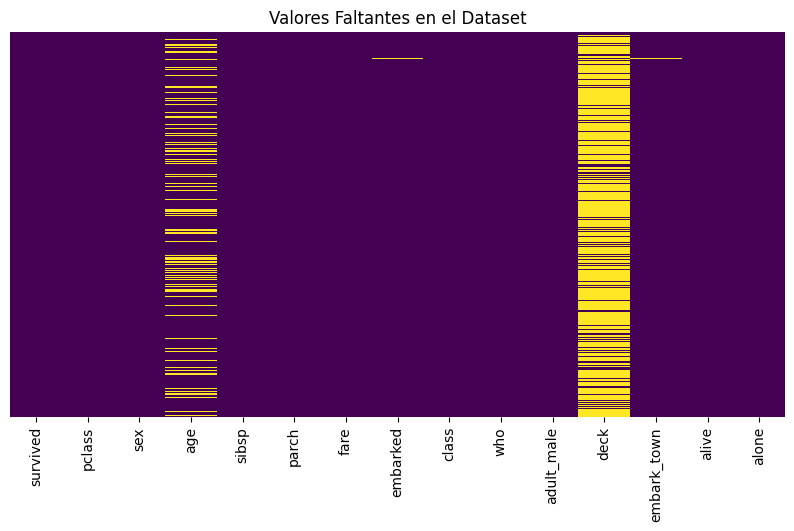

In [4]:
# 2. Identificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de valores faltantes
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Valores Faltantes en el Dataset")
plt.show()


In [5]:
# Imputar valores faltantes con la media
df["age"].fillna(df["age"].mean(), inplace=True)

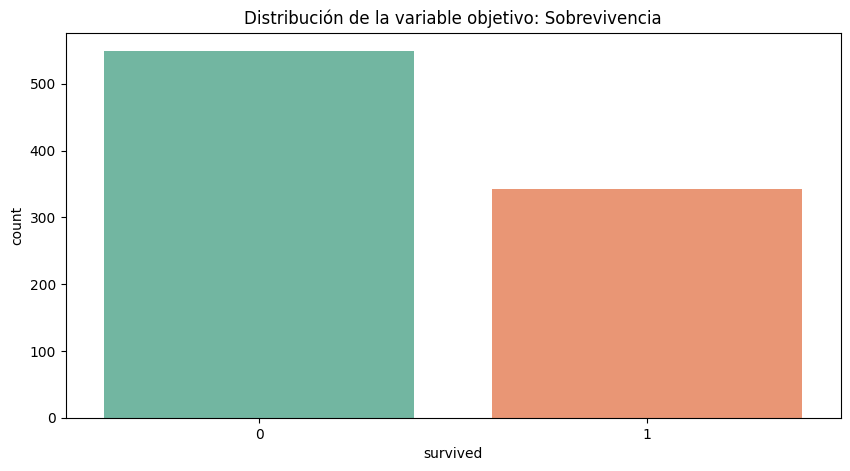

In [6]:
# 3. Análisis Univariado
plt.figure(figsize=(10, 5))
sns.countplot(x='survived', data=df, palette='Set2')
plt.title("Distribución de la variable objetivo: Sobrevivencia")
plt.show()



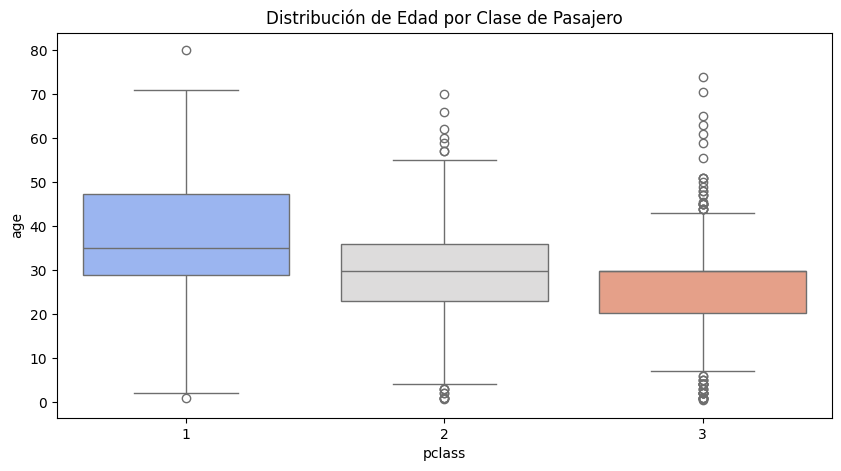

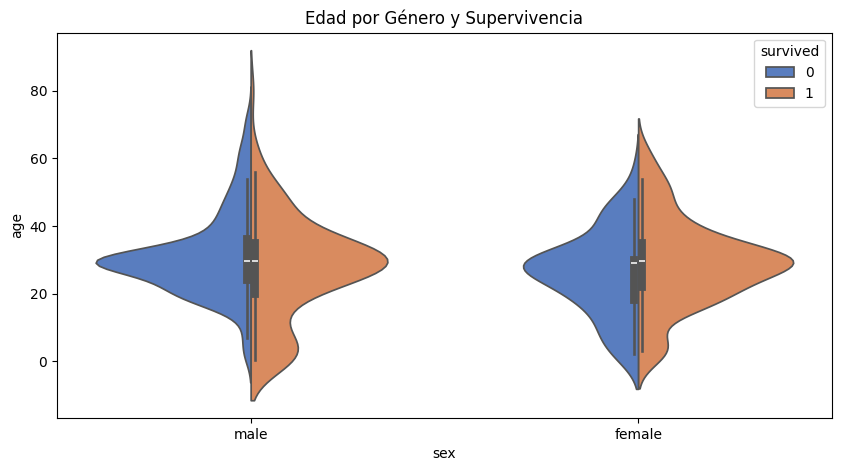

In [7]:
# 4. Análisis Bivariado
plt.figure(figsize=(10, 5))
sns.boxplot(x='pclass', y='age', data=df, palette='coolwarm')
plt.title("Distribución de Edad por Clase de Pasajero")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x='sex', y='age', hue='survived', data=df, split=True, palette='muted')
plt.title("Edad por Género y Supervivencia")
plt.show()



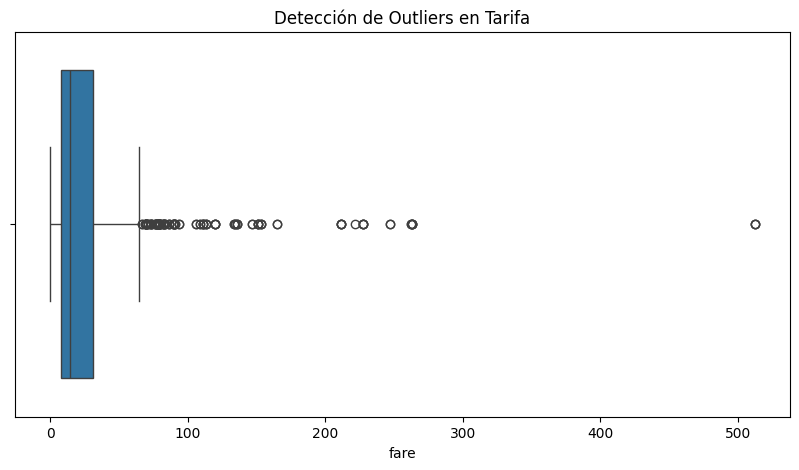

In [8]:
# 5. Identificación de Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare'])
plt.title("Detección de Outliers en Tarifa")
plt.show()


In [9]:
# 6. Transformaciones y Tratamiento de Datos
# Relleno de valores faltantes
df['age'].fillna(df['age'].median(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)  # Demasiados valores nulos

# Conversión de variables categóricas
df = pd.get_dummies(df, columns=['sex', 'embark_town'], drop_first=True)



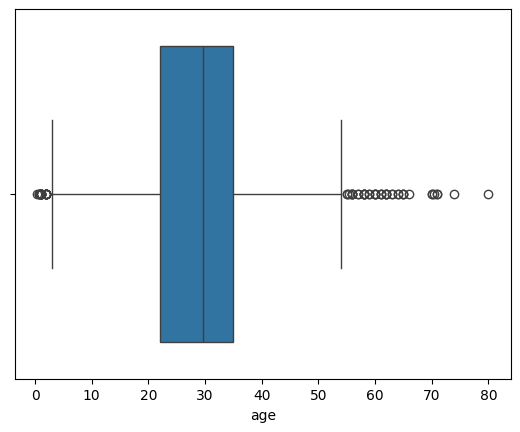

In [10]:
# 7. Detección y tratamiento de outliers en age
sns.boxplot(x=df["age"])
plt.show()


In [11]:
# 8. Eliminación o transformación de outliers
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["age"] >= (Q1 - 1.5 * IQR)) & (df["age"] <= (Q3 + 1.5 * IQR))]

In [12]:
# 9. Normalización y estandarización
# Normalización Min-Max:**
scaler = MinMaxScaler()
df["age_norm"] = scaler.fit_transform(df[["age"]])
# Estandarización (Z-score):
scaler = StandardScaler()
df["age_std"] = scaler.fit_transform(df[["age"]])
# Transformaciones logarítmicas para reducir sesgo:
df["fare_log"] = np.log1p(df["fare"])

In [13]:
# 10. Creación de nuevas variables:
df["familysize"] = df["sibsp"] + df["parch"] + 1

In [14]:
# 11. Cálculo de la matriz de correlación:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()
print(corr_matrix)

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.367774 -0.027320 -0.030860  0.074199  0.269672   
pclass     -0.367774  1.000000 -0.286128  0.057760  0.018742 -0.552684   
age        -0.027320 -0.286128  1.000000 -0.182124 -0.131052  0.091278   
sibsp      -0.030860  0.057760 -0.182124  1.000000  0.408487  0.166625   
parch       0.074199  0.018742 -0.131052  0.408487  1.000000  0.190001   
fare        0.269672 -0.552684  0.091278  0.166625  0.190001  1.000000   
age_norm   -0.027320 -0.286128  1.000000 -0.182124 -0.131052  0.091278   
age_std    -0.027320 -0.286128  1.000000 -0.182124 -0.131052  0.091278   
fare_log    0.344689 -0.657273  0.098061  0.326940  0.316997  0.782324   
familysize  0.016065  0.048929 -0.190345  0.889225  0.780800  0.209281   

            age_norm   age_std  fare_log  familysize  
survived   -0.027320 -0.027320  0.344689    0.016065  
pclass     -0.286128 -0.286128 -0.657273    0.048929  
age         1.000000

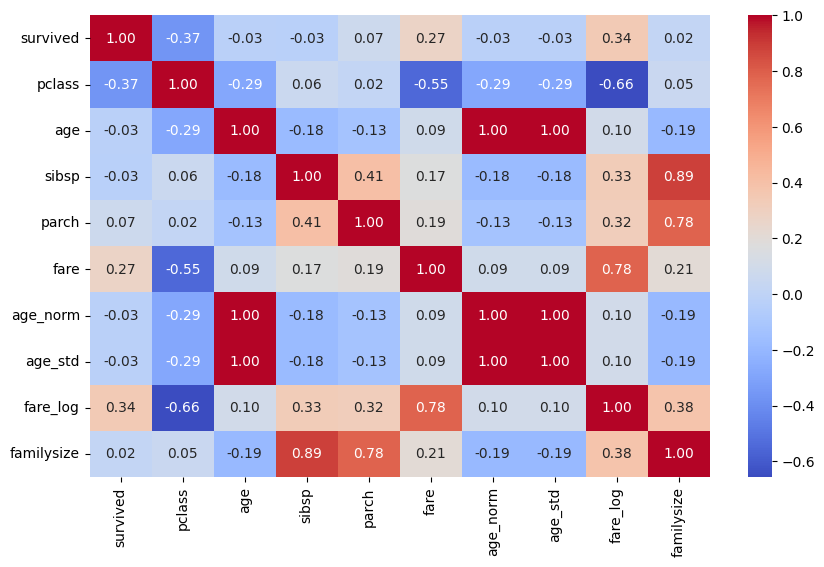

In [15]:
# 12. Visualización con un heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [16]:
# 13. Resumen estadístico de los datos:
print(df.describe())


         survived      pclass         age       sibsp       parch        fare  \
count  825.000000  825.000000  825.000000  825.000000  825.000000  825.000000   
mean     0.380606    2.341818   28.879689    0.507879    0.357576   31.483615   
std      0.485830    0.824096   10.182710    1.090670    0.798599   49.956429   
min      0.000000    1.000000    3.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800   
50%      0.000000    3.000000   29.699118    0.000000    0.000000   13.416700   
75%      1.000000    3.000000   34.000000    1.000000    0.000000   30.070800   
max      1.000000    3.000000   54.000000    8.000000    6.000000  512.329200   

         age_norm       age_std    fare_log  familysize  
count  825.000000  8.250000e+02  825.000000  825.000000  
mean     0.507445  4.736952e-17    2.930259    1.865455  
std      0.199661  1.000607e+00    0.972359    1.593397  
min      0.000000 -2.543074e+00    0.0

In [17]:
# 14. Frecuencia de valores categóricos:
print(df["embarked"].value_counts())

embarked
S    599
C    152
Q     73
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

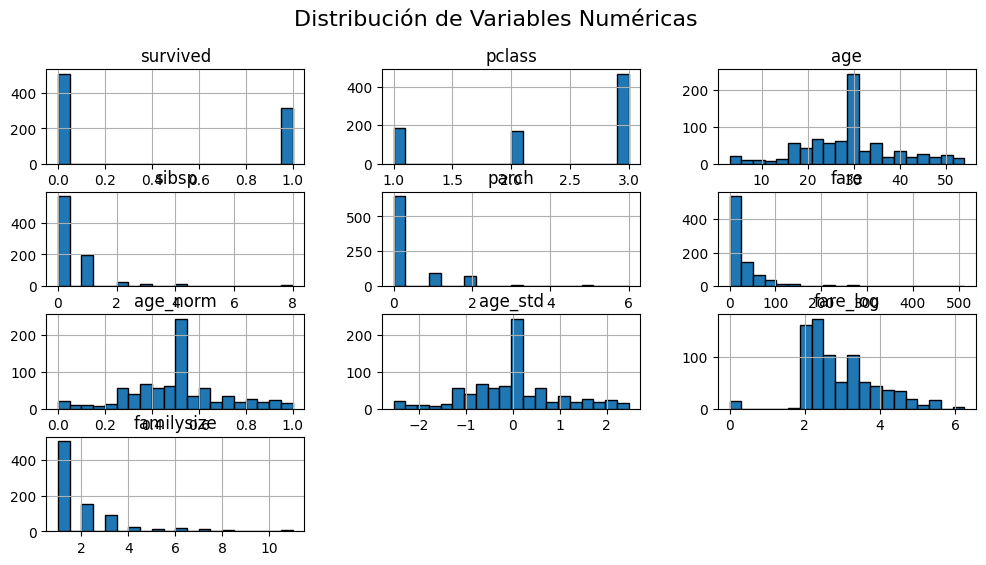

EDA finalizado.


In [18]:
# 15. Distribución de Variables Numéricas
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 6), edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas", fontsize=16)
plt.show()

print("EDA finalizado.")
